In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import pickle
from sklearn.decomposition import PCA
from collections import deque

# create database

In [2]:
if os.name == "nt":
    root = "E:/dataset"
else:
    root = "/media/ritchie46/5E061D60061D3A8B/dataset"
genres = ["hiphop", "edm_dance", "classical", "metal", "jazz"]


In [3]:
total = 0
img = "ms"    
for i in range(len(genres)):
    genre_dir = os.path.join(root, img, genres[i])
    files = os.listdir(genre_dir)
    for j in range(len(files)):
        if os.stat(os.path.join(genre_dir, files[j])).st_size >= 206800:
            total += 1
    
print("total files:", total)
shape = np.load(os.path.join(root, img, genres[0], os.listdir(os.path.join(root, img, genres[0]))[0])).shape
shape

total files: 8354


(128, 2584)

In [4]:
dset_f = h5py.File(os.path.join(root, "ms_dset.hdf5"), "w")


In [5]:
data = dset_f.create_dataset("data", shape=(total, shape[0], shape[1]), dtype="float32")
labels = dset_f.create_dataset("labels", shape=(total, 1), dtype="uint8")


In [7]:
c = 0
for i in range(len(genres)):
    genre_dir = os.path.join(root, img, genres[i])
    files = os.listdir(genre_dir)
    for j in range(len(files)):
        arr = np.load(os.path.join(genre_dir, files[j]))

        if arr.shape[1] >= shape[1]:
            data[c] = arr[:,:shape[1]]
            labels[c] = i
            c += 1
        else:
            print(arr.shape)
        if c >= total:
            break
            

(128, 2336)
(128, 1527)
(128, 646)
(128, 2176)
(128, 1801)
(128, 1175)
(128, 2320)
(128, 1078)
(128, 2494)
(128, 1298)
(128, 2281)
(128, 2439)
(128, 1351)
(128, 1282)
(128, 1718)
(128, 946)
(128, 1426)


In [12]:
labels[-1]

array([5], dtype=uint8)

In [10]:
# test dataset
gen = generate_batch(1)

data = []
labels = []
for i in range(2500):
    val = next(gen)
    data.append(val[0])
    labels.append(val[1])
    
print(data[0].shape)
labels = np.array(labels)
data = np.array(data).reshape(len(data), data[0].shape[1])
print(np.mean(data), np.std(data))

print(data.shape)
pca = PCA(n_components=2)
sol_pca = pca.fit_transform(data)

NameError: name 'generate_batch' is not defined

In [32]:
l = np.empty(labels.shape[0], dtype="uint16")
for i in range(labels.shape[0]):
    l[i] = np.argmax(labels[i])
    


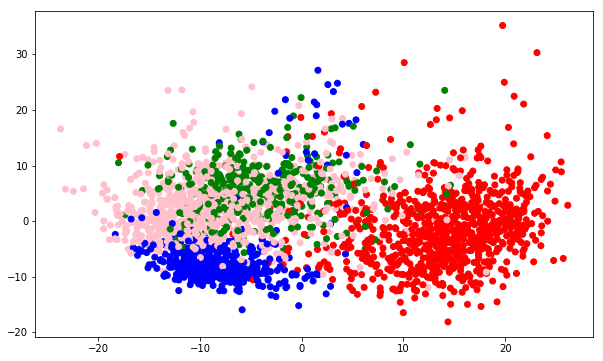

In [34]:
color = np.array(["blue", "green", "pink", "red"], dtype="object")
plt.figure(figsize=(10, 6))
plt.scatter(sol_pca[:,0], sol_pca[:,1], c=color[l])

plt.show()